In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 사기거래 여부 예측하는 데 불필요한 컬럼 제거

In [2]:
cc_df = pd.read_csv('fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

결측값은 존재하지 않음

trans_date_trans_time : 거래 시간
cc_num : 신용카드 번호
merchant : 거래가 발생한 상점 또는 가맹점 이름
category : 상점의 카테고리 또는 업종
amt : 거래 금액
first : 카드 소유자의 이름
last : 카드 소유자의 성
gender : 카드 소유자의 성별
street : 카드 소유자의 주소
city : 카드 소유자의 거주 도시
state : 카드 소유자의 거주 주/도
zip : 카드 소유자의 우편번호
lat : 카드 소유자의 거주지 위도
long : 카드 소유자의 거주지 경도
city_pop : 카드 소유자의 거주지 도시의 인구
job : 카드 소유자의 직업
dob : 카드 소유자의 생년월일
trans_num : 거래 번호 (고유번호)
unix_time : 거래 시간을 unix 타임 스탬프로 나타낸 값
merch_lat : 거래가 발생한 상점의 위도
merch_long : 거래가 발생한 상점의 경도
is_fraud : 해당 거래가 사기 거래인지 여부를 나타냄

In [6]:
cc_df = cc_df.drop(['first', 'last', 'street', 'trans_num'], axis=1)

성, 이름, 주소, 고유번호는 개인적이며, 구체적인 내용이기 때문에 사기 예측에는 도움이 되지 않을 것이라 예상 됨.

In [7]:
cc_df.rename({'gender' : 'owner_gender', 'city' : 'owner_city', 'state' : 'owner_state', 'zip' : 'owner_zip', 'lat' : 'owner_lat', 'long' : 'owner_long', 'city_pop' : 'owner_city_pop', 'job' : 'owner_job', 'dob' : 'owner_dob'}, axis=1, inplace=True)

해당 테이블은 카드 소유자와 거래 대상이 잘 구분되지 않아 컬럼명을 변경할 필요가 있음

In [8]:
cc_df.describe()

,cc_num,amt,owner_zip,owner_lat,owner_long,owner_city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


<AxesSubplot:ylabel='amt'>

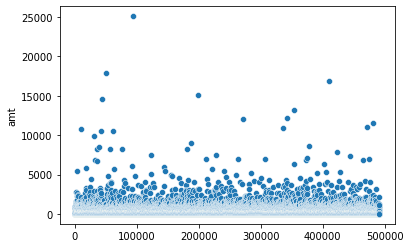

In [9]:
sns.scatterplot(x = cc_df.index, y = cc_df['amt'])

amt 테이블에 이상치가 관측됨

In [10]:
cc_df[(cc_df['amt'] > 5000) & (cc_df['is_fraud'] == 1)]

,trans_date_trans_time,cc_num,merchant,category,amt,owner_gender,owner_city,owner_state,owner_zip,owner_lat,owner_long,owner_city_pop,owner_job,owner_dob,unix_time,merch_lat,merch_long,is_fraud


amt 5000 이상의 사기당한 데이터가 없으므로 amt 5000 이상 데이터는 이상치로 판단하고 삭제를 진행

In [11]:
cc_df = cc_df[(cc_df['amt'] < 5000)]

### 카드 소유자의 거래 당시 나이 피처를 생성

In [12]:
cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])

In [13]:
cc_df['owner_dob'] = pd.to_datetime(cc_df['owner_dob'])

In [14]:
cc_df['owner_age'] = (((cc_df['trans_date_trans_time'] - cc_df['owner_dob']).dt.days) / 365.25).astype(int)

(거래 날짜 - 생년월일) / 365.25(1년의 평균일수)

In [15]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,owner_gender,owner_city,owner_state,owner_zip,owner_lat,owner_long,owner_city_pop,owner_job,owner_dob,unix_time,merch_lat,merch_long,is_fraud,owner_age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,40
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,1325376754,40.079588,-74.848087,0,38
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,1325377036,40.021888,-74.228188,0,44
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,1325377215,42.360426,-83.552316,0,47
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1325377421,29.737426,-90.853194,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,1388534208,34.853497,-78.664158,0,37
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,1388534217,35.008839,-81.475156,0,36
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0,21
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0,39


### 나이대 별 사기거래 예측을 위해 나이 테이블을 이용하여 나이대 피처 생성

In [16]:
cc_df['owner_age'].min()

14

In [17]:
cc_df['owner_age'].max()

50

In [18]:
def age_func(x):
    if x['owner_age'] < 20:
        return 'under 20'
    elif x['owner_age'] >= 20 and x['owner_age'] < 30:
        return 'between 20 and 30'
    elif x['owner_age'] >= 30 and x['owner_age'] < 40:
        return 'betwwen 30 and 40'
    elif x['owner_age'] >= 40 and x['owner_age'] < 50:
        return 'betwwen 40 and 50'
    elif x['owner_age'] >= 50 and x['owner_age'] < 60:
        return 'betwwen 50 and 60'
    else:
        return 'over 60'

In [19]:
cc_df['age_range'] = cc_df.apply(age_func, axis = 1)

In [20]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,owner_gender,owner_city,owner_state,owner_zip,owner_lat,owner_long,owner_city_pop,owner_job,owner_dob,unix_time,merch_lat,merch_long,is_fraud,owner_age,age_range
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,40,betwwen 40 and 50
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,1325376754,40.079588,-74.848087,0,38,betwwen 30 and 40
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,1325377036,40.021888,-74.228188,0,44,betwwen 40 and 50
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,1325377215,42.360426,-83.552316,0,47,betwwen 40 and 50
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1325377421,29.737426,-90.853194,0,41,betwwen 40 and 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,1388534208,34.853497,-78.664158,0,37,betwwen 30 and 40
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,1388534217,35.008839,-81.475156,0,36,betwwen 30 and 40
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0,21,between 20 and 30
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0,39,betwwen 30 and 40


### 금액대 별 사기거래 예측을 위해 amt 테이블을 이용하여 금액대 피처 생성

In [21]:
def amt_func(x):
    if x['amt'] < 10:
        return 'under 10'
    elif x['amt'] >= 10 and x['amt'] < 50:
        return 'between 10 and 50'
    elif x['amt'] >= 50 and x['amt'] < 100:
        return 'betwwen 50 and 100'
    elif x['amt'] >= 100 and x['amt'] < 200:
        return 'betwwen 100 and 200'
    elif x['amt'] >= 200 and x['amt'] < 300:
        return 'betwwen 200 and 300'
    else:
        return 'over 300'

In [22]:
cc_df['amt_range'] = cc_df.apply(amt_func, axis = 1)

In [23]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,owner_gender,owner_city,owner_state,owner_zip,owner_lat,owner_long,owner_city_pop,owner_job,owner_dob,unix_time,merch_lat,merch_long,is_fraud,owner_age,age_range,amt_range
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,40,betwwen 40 and 50,betwwen 100 and 200
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,1325376754,40.079588,-74.848087,0,38,betwwen 30 and 40,between 10 and 50
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,1325377036,40.021888,-74.228188,0,44,betwwen 40 and 50,between 10 and 50
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,1325377215,42.360426,-83.552316,0,47,betwwen 40 and 50,betwwen 50 and 100
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1325377421,29.737426,-90.853194,0,41,betwwen 40 and 50,between 10 and 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,1388534208,34.853497,-78.664158,0,37,betwwen 30 and 40,betwwen 100 and 200
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,1388534217,35.008839,-81.475156,0,36,betwwen 30 and 40,between 10 and 50
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0,21,between 20 and 30,betwwen 100 and 200
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0,39,betwwen 30 and 40,betwwen 50 and 100


In [24]:
cc_df['amt_range'].value_counts()

under 10               136817
between 10 and 50      136324
betwwen 50 and 100     129164
betwwen 100 and 200     60438
betwwen 200 and 300     17881
over 300                10460
Name: amt_range, dtype: int64

### 카드 소유자의 주소와 상점 간의 거리 피처 생성

In [25]:
# pip install haversine

경도 위도 거리 계산 패키지 설치

In [26]:
# numpy 버전 1.21이하에서 가능
from haversine import haversine

In [27]:
owner_dis = (cc_df['owner_lat'][0], cc_df['owner_long'][0])
merch_dis = (cc_df['merch_lat'][0], cc_df['merch_long'][0])

In [28]:
dis = haversine(owner_dis, merch_dis, unit = 'km')
print(dis)

30.2122174500456


In [29]:
def dis_count(x):
    owner_dis = (x['owner_lat'], x['owner_long'])
    merch_dis = (x['merch_lat'], x['merch_long'])
    
    dis = haversine(owner_dis, merch_dis, unit = 'mi')
    
    return dis

In [30]:
cc_df['distance(mile)'] = cc_df.apply(lambda x: dis_count(x), axis = 1)

In [31]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,owner_gender,owner_city,owner_state,owner_zip,owner_lat,owner_long,owner_city_pop,owner_job,owner_dob,unix_time,merch_lat,merch_long,is_fraud,owner_age,age_range,amt_range,distance(mile)
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,40,betwwen 40 and 50,betwwen 100 and 200,18.773002
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,1325376754,40.079588,-74.848087,0,38,betwwen 30 and 40,between 10 and 50,52.631530
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,1325377036,40.021888,-74.228188,0,44,betwwen 40 and 50,between 10 and 50,42.158691
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,1325377215,42.360426,-83.552316,0,47,betwwen 40 and 50,betwwen 50 and 100,13.859024
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1325377421,29.737426,-90.853194,0,41,betwwen 40 and 50,between 10 and 50,49.456209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,1388534208,34.853497,-78.664158,0,37,betwwen 30 and 40,betwwen 100 and 200,60.911256
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,1388534217,35.008839,-81.475156,0,36,betwwen 30 and 40,between 10 and 50,79.151846
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0,21,between 20 and 30,betwwen 100 and 200,62.183448
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0,39,betwwen 30 and 40,betwwen 50 and 100,50.181573


### 주말에 일어난 사기인지 아닌지 판단하는 피처

In [32]:
cc_df['is_weekend'] = (cc_df['trans_date_trans_time'].dt.weekday >= 5).astype(int)

In [33]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,owner_gender,owner_city,owner_state,owner_zip,owner_lat,owner_long,owner_city_pop,owner_job,owner_dob,unix_time,merch_lat,merch_long,is_fraud,owner_age,age_range,amt_range,distance(mile),is_weekend
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,40,betwwen 40 and 50,betwwen 100 and 200,18.773002,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,1325376754,40.079588,-74.848087,0,38,betwwen 30 and 40,between 10 and 50,52.631530,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,1325377036,40.021888,-74.228188,0,44,betwwen 40 and 50,between 10 and 50,42.158691,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,1325377215,42.360426,-83.552316,0,47,betwwen 40 and 50,betwwen 50 and 100,13.859024,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1325377421,29.737426,-90.853194,0,41,betwwen 40 and 50,between 10 and 50,49.456209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,1388534208,34.853497,-78.664158,0,37,betwwen 30 and 40,betwwen 100 and 200,60.911256,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,1388534217,35.008839,-81.475156,0,36,betwwen 30 and 40,between 10 and 50,79.151846,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0,21,between 20 and 30,betwwen 100 and 200,62.183448,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0,39,betwwen 30 and 40,betwwen 50 and 100,50.181573,0


# 회고

머리를 좀 더 굴리면 괜찮은 피처를 좀 더 많을 수 있을 것 같은데 상상력이 많이 부족한 것 같다.

한 시간은 데이터 테이블 자체를 이해 하느라 늦게 시작하였다. 해당 컬럼이 무슨 역할을 하는지를 알아야 분석을 할텐데 읽는 시간이 많이 느려서 시간이 많이 지체 되었다.

데이터 분석가는 다양한 지식을 가질 수록 유리할 것 같다는 생각이 드는 시간이였습니다.